# **Project Name**   - Multiclass Fish Image Classification

##### **Project Type**    -  Image Classification 

##### **Contribution**    - Individual
##### **Name** - Ayush Singh

# **Project Summary** 

This project focuses on building an AI-powered fish species classification system capable of accurately identifying 11 different fish and seafood classes from images. The work covers the complete machine learning lifecycle: from data preprocessing, model training, performance evaluation, to building an interactive deployment app.

A clean dataset arranged into train, validation, and test splits was used, with data augmentation (rotation, flips, zoom) applied to improve generalization. We trained:

	•	A custom Convolutional Neural Network (CNN) from scratch
	•	Five pre-trained deep learning architectures — VGG16, ResNet50, MobileNet, InceptionV3, and EfficientNetB0 — using transfer learning

A two-phase strategy was applied for the pre-trained networks:

	1.	Feature extraction (frozen base layers + custom dense head)
	2.	Fine-tuning (unfreezing the top layers with a low learning rate)

Models were evaluated using accuracy, precision, recall, F1-score, and confusion matrices on the test set. Transfer learning significantly outperformed the custom CNN, with ResNet50 and EfficientNetB0 showing the highest overall accuracy.

Finally, the best-performing models were integrated into a Streamlit web application, allowing users to:

	•	Upload their own fish images or choose from sample images
	•	See top-3 predictions with confidence scores
	•	View confidence distribution across all classes
	•	Read informative descriptions about the predicted fish species

# **Github Link**

# **Problem Statement**

The goal of this project is to develop an automated system for accurately classifying fish species from images. The system should leverage deep learning techniques by:
	
•	Training a Convolutional Neural Network (CNN) from scratch on a labeled fish image dataset.
    
•	Utilizing transfer learning with pre-trained models to improve classification performance.

•	Saving trained models for future inference or further training.
        
•	Deploying a user-friendly Streamlit web application that allows users to upload fish images and receive instant predictions          
of their respective categories.

# **Business Use Cases**

Enhanced Accuracy: Determine the best model architecture for fish image classification.
                                                        
Deployment Ready: Create a user-friendly web application for real-time predictions.
                                                        
Model Comparison: Evaluate and compare metrics across models to select the most suitable approach for the task.


# Let's Start

In [17]:
#importing important libraries
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Clustering
from sklearn.cluster import KMeans

In [18]:
import os
print(os.listdir('.'))

['images.cv_jzk6llhf18tm3k0kyttxz', '.DS_Store', 'Multiclass Fish Image Classification.ipynb', '.ipynb_checkpoints']


In [19]:
print(os.listdir('images.cv_jzk6llhf18tm3k0kyttxz'))

['.DS_Store', 'readme.txt', 'data']


In [22]:
print(os.listdir('.'))  # Should show both your notebook .ipynb and 'images.cv_jzk6llhf18tm3k0kyttxz'
print(os.listdir('images.cv_jzk6llhf18tm3k0kyttxz'))  # Should show 'data', 'readme.txt', etc.
print(os.listdir('images.cv_jzk6llhf18tm3k0kyttxz/data'))  # Should show your image class folders or images

['images.cv_jzk6llhf18tm3k0kyttxz', '.DS_Store', 'Multiclass Fish Image Classification.ipynb', '.ipynb_checkpoints']
['.DS_Store', 'readme.txt', 'data']
['test', 'train', 'val']


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    'images.cv_jzk6llhf18tm3k0kyttxz/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    'images.cv_jzk6llhf18tm3k0kyttxz/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 8404 images belonging to 3 classes.
Found 2100 images belonging to 3 classes.


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Rescaling only for validation and testing
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'images.cv_jzk6llhf18tm3k0kyttxz/data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    'images.cv_jzk6llhf18tm3k0kyttxz/data/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'images.cv_jzk6llhf18tm3k0kyttxz/data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for evaluation
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [26]:
# Training a CNN Model from scratch 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (224, 224, 3)  
num_classes = 11            

model_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
#Pre-trained Model Architectures (Transfer Learning & Fine-Tuning)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0

def build_pretrained_model(base_model_class, input_shape, num_classes):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model

models_to_train = {
    'VGG16': VGG16,
    'ResNet50': ResNet50,
    'MobileNet': MobileNet,
    'InceptionV3': InceptionV3,
    'EfficientNetB0': EfficientNetB0
}

trained_models = {}

for name, base_model_class in models_to_train.items():
    print(f"Building {name} model...")
    model = build_pretrained_model(base_model_class, input_shape, num_classes)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    trained_models[name] = model

Building VGG16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Building ResNet50 model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step
Building MobileNet model...
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Building InceptionV3 model...
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Building EfficientNetB0 model...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
earlystop_cb = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [32]:
# Training CNN Scratch model

In [31]:
history_scratch = model_scratch.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint_cb, earlystop_cb]
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.3030 - loss: 1.9955

195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 418ms/step - accuracy: 0.3036 - loss: 1.9939 - val_accuracy: 0.6355 - val_loss: 1.0652
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.5906 - loss: 1.1618

195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 472ms/step - accuracy: 0.5908 - loss: 1.1614 - val_accuracy: 0.7299 - val_loss: 0.7619
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.6665 - loss: 0.9419

195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 478ms/step - accuracy: 0.6667 - loss: 0.9415 - val_accuracy: 0.8352 - val_loss: 0.5324
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.7332 - loss: 0.7520

195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 505ms/step - accuracy: 0.7333 - loss: 0.7517 - val_accuracy: 0.8864 - val_loss: 0.4221
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8008 - loss: 0.5811

195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 484ms/step - accuracy: 0.8008 - loss: 0.5812 - val_accuracy: 0.8965 - val_loss: 0.3515
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8220 - loss: 0.5174

195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 486ms/step - accuracy: 0.8221 - loss: 0.5174 - val_accuracy: 0.9423 - val_loss: 0.2283
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 527ms/step - accuracy: 0.8354 - loss: 0.4716 - val_accuracy: 0.8819 - val_loss: 0.3991
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.8328 - loss: 0.4756

195/195 ━━━━━━━━━━━━━━━━━━━━ 116s 592ms/step - accuracy: 0.8328 - loss: 0.4756 - val_accuracy: 0.9524 - val_loss: 0.1861
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.8548 - loss: 0.4004

195/195 ━━━━━━━━━━━━━━━━━━━━ 104s 532ms/step - accuracy: 0.8548 - loss: 0.4005 - val_accuracy: 0.9551 - val_loss: 0.1811
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.8639 - loss: 0.3766

195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 566ms/step - accuracy: 0.8639 - loss: 0.3767 - val_accuracy: 0.9698 - val_loss: 0.1219
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 115s 589ms/step - accuracy: 0.8860 - loss: 0.3363 - val_accuracy: 0.9588 - val_loss: 0.1546
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 111s 571ms/step - accuracy: 0.8750 - loss: 0.3828 - val_accuracy: 0.9643 - val_loss: 0.1188
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 628ms/step - accuracy: 0.9047 - loss: 0.2960 - val_accuracy: 0.9277 - val_loss: 0.2208
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 647ms/step - accuracy: 0.8978 - loss: 0.2803 - val_accuracy: 0.9679 - val_loss: 0.1553
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.9011 - loss: 0.2791

195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 609ms/step - accuracy: 0.9011 - loss: 0.2792 - val_accuracy: 0.9817 - val_loss: 0.0730
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 114s 582ms/step - accuracy: 0.9034 - loss: 0.2762 - val_accuracy: 0.9744 - val_loss: 0.0954
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.9129 - loss: 0.2593

195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 574ms/step - accuracy: 0.9129 - loss: 0.2593 - val_accuracy: 0.9890 - val_loss: 0.0698
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 104s 534ms/step - accuracy: 0.9259 - loss: 0.2217 - val_accuracy: 0.9881 - val_loss: 0.0663
Epoch 19/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 105s 538ms/step - accuracy: 0.9157 - loss: 0.2359 - val_accuracy: 0.9789 - val_loss: 0.0846
Epoch 20/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 546ms/step - accuracy: 0.9259 - loss: 0.2202 - val_accuracy: 0.9560 - val_loss: 0.1648


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

earlystop_cb = EarlyStopping(
    monitor='val_accuracy',      # Metric to monitor
    patience=5,                  # Stop after 5 epochs with no improvement
    restore_best_weights=True    # Keep the best weights after stopping
)

num_classes = 11  # adjust if your dataset has a different number of classes

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    'images.cv_jzk6llhf18tm3k0kyttxz/data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'images.cv_jzk6llhf18tm3k0kyttxz/data/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [9]:
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0

pretrained_classes = {
    'VGG16': VGG16,
    'ResNet50': ResNet50,
    'MobileNet': MobileNet,
    'InceptionV3': InceptionV3,
    'EfficientNetB0': EfficientNetB0
}

input_shape = (224, 224, 3)  # Use your target image shape

for name, model_class in pretrained_classes.items():
    print(f"\n{name} - Layer info:")
    # Instantiate base model (weights not required for structure display)
    base_model = model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    total_layers = len(base_model.layers)
    print(f"Total layers: {total_layers}")

    # First 10 layers
    print("\n  First 10 layers:")
    for i, layer in enumerate(base_model.layers[:10]):
        print(f"    {i}: {layer.name} | {layer.__class__.__name__}")

    # Last 10 layers
    print("\n  Last 10 layers:")
    for i, layer in enumerate(base_model.layers[-10:], start=total_layers-10):
        print(f"    {i}: {layer.name} | {layer.__class__.__name__}")



VGG16 - Layer info:
Total layers: 19

  First 10 layers:
    0: input_layer_7 | InputLayer
    1: block1_conv1 | Conv2D
    2: block1_conv2 | Conv2D
    3: block1_pool | MaxPooling2D
    4: block2_conv1 | Conv2D
    5: block2_conv2 | Conv2D
    6: block2_pool | MaxPooling2D
    7: block3_conv1 | Conv2D
    8: block3_conv2 | Conv2D
    9: block3_conv3 | Conv2D

  Last 10 layers:
    9: block3_conv3 | Conv2D
    10: block3_pool | MaxPooling2D
    11: block4_conv1 | Conv2D
    12: block4_conv2 | Conv2D
    13: block4_conv3 | Conv2D
    14: block4_pool | MaxPooling2D
    15: block5_conv1 | Conv2D
    16: block5_conv2 | Conv2D
    17: block5_conv3 | Conv2D
    18: block5_pool | MaxPooling2D

ResNet50 - Layer info:
Total layers: 175

  First 10 layers:
    0: input_layer_8 | InputLayer
    1: conv1_pad | ZeroPadding2D
    2: conv1_conv | Conv2D
    3: conv1_bn | BatchNormalization
    4: conv1_relu | Activation
    5: pool1_pad | ZeroPadding2D
    6: pool1_pool | MaxPooling2D
    7: conv2_b

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0

# Adjust as needed
num_classes = 11
input_shape = (224, 224, 3)

pretrained_classes = {
    'VGG16': VGG16,
    'ResNet50': ResNet50,
    'MobileNet': MobileNet,
    'InceptionV3': InceptionV3,
    'EfficientNetB0': EfficientNetB0
}

for name, model_class in pretrained_classes.items():
    print(f"\nRunning model: {name}")

    # 1. Build base model and classifier head
    base_model = model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze all layers for feature extraction
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    # 2. Compile
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    # 3. Set up unique callbacks
    checkpoint_cb = ModelCheckpoint(f'best_{name.lower()}.h5', save_best_only=True, monitor='val_accuracy', mode='max')
    earlystop_cb = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    # 4. Train classifier head (feature extraction)
    print("  Training classifier head...")
    model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,
        callbacks=[checkpoint_cb, earlystop_cb]
    )

    # 5. Fine-tune: unfreeze last 10 layers of base model
    print("  Fine-tuning top 10 base layers...")
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Re-compile with a low learning rate for fine-tuning
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,
        callbacks=[checkpoint_cb, earlystop_cb]
    )

    print(f"  Model {name} complete. Best weights saved as best_{name.lower()}.h5.")



Running model: VGG16
  Training classifier head...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1310 - loss: 2.4927

195/195 ━━━━━━━━━━━━━━━━━━━━ 736s 4s/step - accuracy: 0.1312 - loss: 2.4920 - val_accuracy: 0.2518 - val_loss: 2.0962
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2555 - loss: 2.1083

195/195 ━━━━━━━━━━━━━━━━━━━━ 779s 4s/step - accuracy: 0.2556 - loss: 2.1081 - val_accuracy: 0.4597 - val_loss: 1.9171
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3513 - loss: 1.9360

195/195 ━━━━━━━━━━━━━━━━━━━━ 817s 4s/step - accuracy: 0.3514 - loss: 1.9358 - val_accuracy: 0.5824 - val_loss: 1.7755
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4265 - loss: 1.7824

195/195 ━━━━━━━━━━━━━━━━━━━━ 812s 4s/step - accuracy: 0.4265 - loss: 1.7823 - val_accuracy: 0.6630 - val_loss: 1.6574
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4694 - loss: 1.6912

195/195 ━━━━━━━━━━━━━━━━━━━━ 857s 4s/step - accuracy: 0.4695 - loss: 1.6911 - val_accuracy: 0.6978 - val_loss: 1.5541
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5152 - loss: 1.5992

195/195 ━━━━━━━━━━━━━━━━━━━━ 822s 4s/step - accuracy: 0.5153 - loss: 1.5991 - val_accuracy: 0.7106 - val_loss: 1.4608
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5480 - loss: 1.5053

195/195 ━━━━━━━━━━━━━━━━━━━━ 806s 4s/step - accuracy: 0.5480 - loss: 1.5053 - val_accuracy: 0.7344 - val_loss: 1.3794
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5768 - loss: 1.4477

195/195 ━━━━━━━━━━━━━━━━━━━━ 798s 4s/step - accuracy: 0.5768 - loss: 1.4475 - val_accuracy: 0.7381 - val_loss: 1.2966
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5978 - loss: 1.3546

195/195 ━━━━━━━━━━━━━━━━━━━━ 730s 4s/step - accuracy: 0.5978 - loss: 1.3546 - val_accuracy: 0.7701 - val_loss: 1.2302
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6184 - loss: 1.3124

195/195 ━━━━━━━━━━━━━━━━━━━━ 732s 4s/step - accuracy: 0.6184 - loss: 1.3122 - val_accuracy: 0.7811 - val_loss: 1.1605
  Fine-tuning top 10 base layers...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7395 - loss: 0.8320

195/195 ━━━━━━━━━━━━━━━━━━━━ 1315s 7s/step - accuracy: 0.7398 - loss: 0.8310 - val_accuracy: 0.9478 - val_loss: 0.2693
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9065 - loss: 0.2891

195/195 ━━━━━━━━━━━━━━━━━━━━ 1313s 7s/step - accuracy: 0.9066 - loss: 0.2890 - val_accuracy: 0.9844 - val_loss: 0.1269
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9633 - loss: 0.1557

195/195 ━━━━━━━━━━━━━━━━━━━━ 1381s 7s/step - accuracy: 0.9632 - loss: 0.1557 - val_accuracy: 0.9863 - val_loss: 0.0857
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1543s 8s/step - accuracy: 0.9696 - loss: 0.1152 - val_accuracy: 0.9789 - val_loss: 0.0953
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1535s 8s/step - accuracy: 0.9716 - loss: 0.1058 - val_accuracy: 0.9835 - val_loss: 0.0532
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1519s 8s/step - accuracy: 0.9789 - loss: 0.0759 - val_accuracy: 0.9808 - val_loss: 0.0500
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9848 - loss: 0.0498

195/195 ━━━━━━━━━━━━━━━━━━━━ 1553s 8s/step - accuracy: 0.9848 - loss: 0.0498 - val_accuracy: 0.9872 - val_loss: 0.0421
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1521s 8s/step - accuracy: 0.9872 - loss: 0.0439 - val_accuracy: 0.9872 - val_loss: 0.0390
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9876 - loss: 0.0488

195/195 ━━━━━━━━━━━━━━━━━━━━ 1454s 7s/step - accuracy: 0.9876 - loss: 0.0487 - val_accuracy: 0.9899 - val_loss: 0.0560
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9810 - loss: 0.0649

195/195 ━━━━━━━━━━━━━━━━━━━━ 1454s 7s/step - accuracy: 0.9810 - loss: 0.0648 - val_accuracy: 0.9936 - val_loss: 0.0346
  Model VGG16 complete. Best weights saved as best_vgg16.h5.

Running model: ResNet50
  Training classifier head...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1109 - loss: 2.6231

195/195 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.1110 - loss: 2.6222 - val_accuracy: 0.1712 - val_loss: 2.2931
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.1775 - loss: 2.3154 - val_accuracy: 0.1712 - val_loss: 2.2715
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.1770 - loss: 2.2892 - val_accuracy: 0.1712 - val_loss: 2.2488
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.1819 - loss: 2.2796 - val_accuracy: 0.1712 - val_loss: 2.2301
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1857 - loss: 2.2530

195/195 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.1858 - loss: 2.2530 - val_accuracy: 0.1731 - val_loss: 2.2093
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.1911 - loss: 2.2355 - val_accuracy: 0.1667 - val_loss: 2.1904
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.2059 - loss: 2.2147 - val_accuracy: 0.1658 - val_loss: 2.1784
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2018 - loss: 2.2040

195/195 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.2018 - loss: 2.2040 - val_accuracy: 0.1767 - val_loss: 2.1638
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2105 - loss: 2.1940

195/195 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.2105 - loss: 2.1940 - val_accuracy: 0.1996 - val_loss: 2.1476
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2061 - loss: 2.1816

195/195 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.2061 - loss: 2.1816 - val_accuracy: 0.2436 - val_loss: 2.1314
  Fine-tuning top 10 base layers...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2020 - loss: 2.5764

195/195 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.2022 - loss: 2.5745 - val_accuracy: 0.2692 - val_loss: 2.1042
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3260 - loss: 1.9319

195/195 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.3261 - loss: 1.9317 - val_accuracy: 0.3755 - val_loss: 1.8859
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3785 - loss: 1.8147

195/195 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.3786 - loss: 1.8146 - val_accuracy: 0.4826 - val_loss: 1.6777
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4183 - loss: 1.7159

195/195 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.4182 - loss: 1.7158 - val_accuracy: 0.5531 - val_loss: 1.5234
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.4317 - loss: 1.6608 - val_accuracy: 0.5513 - val_loss: 1.4793
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4571 - loss: 1.5850

195/195 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.4571 - loss: 1.5848 - val_accuracy: 0.6016 - val_loss: 1.3550
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4829 - loss: 1.5087

195/195 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.4829 - loss: 1.5087 - val_accuracy: 0.6300 - val_loss: 1.2836
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4827 - loss: 1.5037

195/195 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.4828 - loss: 1.5035 - val_accuracy: 0.6337 - val_loss: 1.2898
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4990 - loss: 1.4529

195/195 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.4991 - loss: 1.4527 - val_accuracy: 0.6401 - val_loss: 1.2049
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5319 - loss: 1.3803

195/195 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.5319 - loss: 1.3803 - val_accuracy: 0.6529 - val_loss: 1.1414
  Model ResNet50 complete. Best weights saved as best_resnet50.h5.

Running model: MobileNet
  Training classifier head...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.2520 - loss: 2.3357

195/195 ━━━━━━━━━━━━━━━━━━━━ 65s 332ms/step - accuracy: 0.2526 - loss: 2.3332 - val_accuracy: 0.8114 - val_loss: 0.9531
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6424 - loss: 1.1122

195/195 ━━━━━━━━━━━━━━━━━━━━ 64s 330ms/step - accuracy: 0.6426 - loss: 1.1115 - val_accuracy: 0.9313 - val_loss: 0.4875
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.7758 - loss: 0.7221

195/195 ━━━━━━━━━━━━━━━━━━━━ 65s 334ms/step - accuracy: 0.7759 - loss: 0.7217 - val_accuracy: 0.9551 - val_loss: 0.3005
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8474 - loss: 0.5104

195/195 ━━━━━━━━━━━━━━━━━━━━ 65s 331ms/step - accuracy: 0.8475 - loss: 0.5103 - val_accuracy: 0.9652 - val_loss: 0.2104
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.8862 - loss: 0.3943

195/195 ━━━━━━━━━━━━━━━━━━━━ 67s 342ms/step - accuracy: 0.8862 - loss: 0.3943 - val_accuracy: 0.9707 - val_loss: 0.1584
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9052 - loss: 0.3231

195/195 ━━━━━━━━━━━━━━━━━━━━ 65s 330ms/step - accuracy: 0.9052 - loss: 0.3230 - val_accuracy: 0.9762 - val_loss: 0.1259
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 65s 334ms/step - accuracy: 0.9212 - loss: 0.2809 - val_accuracy: 0.9744 - val_loss: 0.1071
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9371 - loss: 0.2265

195/195 ━━━━━━━━━━━━━━━━━━━━ 65s 334ms/step - accuracy: 0.9371 - loss: 0.2266 - val_accuracy: 0.9808 - val_loss: 0.0894
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9434 - loss: 0.2026

195/195 ━━━━━━━━━━━━━━━━━━━━ 64s 330ms/step - accuracy: 0.9434 - loss: 0.2025 - val_accuracy: 0.9844 - val_loss: 0.0724
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 66s 336ms/step - accuracy: 0.9506 - loss: 0.1743 - val_accuracy: 0.9844 - val_loss: 0.0643
  Fine-tuning top 10 base layers...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 392ms/step - accuracy: 0.4490 - loss: 2.5765 - val_accuracy: 0.9817 - val_loss: 0.0877
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.8649 - loss: 0.4417

195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 386ms/step - accuracy: 0.8650 - loss: 0.4411 - val_accuracy: 0.9863 - val_loss: 0.0610
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9294 - loss: 0.2151

195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 385ms/step - accuracy: 0.9295 - loss: 0.2150 - val_accuracy: 0.9881 - val_loss: 0.0503
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9407 - loss: 0.1833

195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 389ms/step - accuracy: 0.9407 - loss: 0.1833 - val_accuracy: 0.9890 - val_loss: 0.0403
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9481 - loss: 0.1610

195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 389ms/step - accuracy: 0.9481 - loss: 0.1610 - val_accuracy: 0.9899 - val_loss: 0.0373
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.9552 - loss: 0.1376

195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 392ms/step - accuracy: 0.9552 - loss: 0.1376 - val_accuracy: 0.9908 - val_loss: 0.0335
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9669 - loss: 0.1203

195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 382ms/step - accuracy: 0.9669 - loss: 0.1203 - val_accuracy: 0.9927 - val_loss: 0.0302
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 380ms/step - accuracy: 0.9658 - loss: 0.1171 - val_accuracy: 0.9918 - val_loss: 0.0302
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 382ms/step - accuracy: 0.9716 - loss: 0.1041 - val_accuracy: 0.9927 - val_loss: 0.0283
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.9691 - loss: 0.0977

195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 386ms/step - accuracy: 0.9691 - loss: 0.0977 - val_accuracy: 0.9954 - val_loss: 0.0257
  Model MobileNet complete. Best weights saved as best_mobilenet.h5.

Running model: InceptionV3
  Training classifier head...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.3271 - loss: 2.0259

195/195 ━━━━━━━━━━━━━━━━━━━━ 180s 911ms/step - accuracy: 0.3279 - loss: 2.0235 - val_accuracy: 0.8535 - val_loss: 0.7061
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.7180 - loss: 0.8716

195/195 ━━━━━━━━━━━━━━━━━━━━ 191s 982ms/step - accuracy: 0.7182 - loss: 0.8712 - val_accuracy: 0.9038 - val_loss: 0.4357
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.8092 - loss: 0.6047

195/195 ━━━━━━━━━━━━━━━━━━━━ 195s 999ms/step - accuracy: 0.8093 - loss: 0.6046 - val_accuracy: 0.9286 - val_loss: 0.3238
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.8441 - loss: 0.5017

195/195 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.8442 - loss: 0.5016 - val_accuracy: 0.9405 - val_loss: 0.2653
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.8722 - loss: 0.4259

195/195 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8722 - loss: 0.4258 - val_accuracy: 0.9432 - val_loss: 0.2191
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.8926 - loss: 0.3651

195/195 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8926 - loss: 0.3650 - val_accuracy: 0.9533 - val_loss: 0.1980
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.8932 - loss: 0.3308 - val_accuracy: 0.9515 - val_loss: 0.1821
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.9105 - loss: 0.2918

195/195 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9106 - loss: 0.2918 - val_accuracy: 0.9560 - val_loss: 0.1660
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.9223 - loss: 0.2642

195/195 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9223 - loss: 0.2642 - val_accuracy: 0.9652 - val_loss: 0.1502
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.9239 - loss: 0.2443 - val_accuracy: 0.9615 - val_loss: 0.1377
  Fine-tuning top 10 base layers...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9219 - loss: 0.2660 - val_accuracy: 0.9634 - val_loss: 0.1505
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9330 - loss: 0.2396 - val_accuracy: 0.9615 - val_loss: 0.1476
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9252 - loss: 0.2412 - val_accuracy: 0.9643 - val_loss: 0.1455
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9225 - loss: 0.2523 - val_accuracy: 0.9643 - val_loss: 0.1439
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.9256 - loss: 0.2365 - val_accuracy: 0.9652 - val_loss: 0.1434
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.9245

195/195 ━━━━━━━━━━━━━━━━━━━━ 104s 518ms/step - accuracy: 0.1474 - loss: 2.3633 - val_accuracy: 0.1712 - val_loss: 2.3180
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 506ms/step - accuracy: 0.1674 - loss: 2.3308 - val_accuracy: 0.1712 - val_loss: 2.3163
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 518ms/step - accuracy: 0.1648 - loss: 2.3278 - val_accuracy: 0.1712 - val_loss: 2.3130
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 508ms/step - accuracy: 0.1778 - loss: 2.3139 - val_accuracy: 0.1712 - val_loss: 2.3130
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 509ms/step - accuracy: 0.1429 - loss: 2.3281 - val_accuracy: 0.1712 - val_loss: 2.3128
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 511ms/step - accuracy: 0.1794 - loss: 2.3196 - val_accuracy: 0.1712 - val_loss: 2.3151
  Fine-tuning top 10 base layers...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 551ms/step - accuracy: 0.0951 - loss: 2.4715 - val_accuracy: 0.1712 - val_loss: 2.3491
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 545ms/ste

Found 3187 images belonging to 11 classes.



Evaluating: best_vgg16.h5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       1.00      0.31      0.47        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      1.00      1.00       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           1.00     

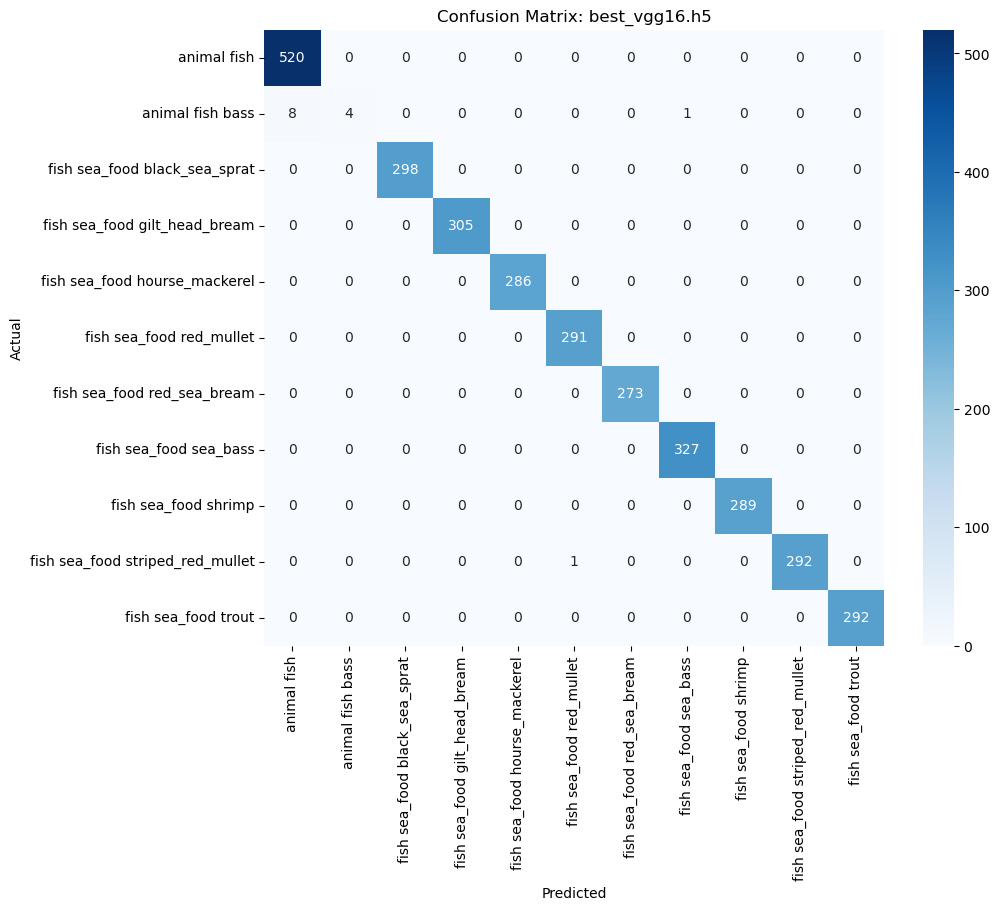


Evaluating: best_resnet50.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step
                                  precision    recall  f1-score   support

                     animal fish       0.88      0.96      0.92       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.52      0.89      0.66       298
   fish sea_food gilt_head_bream       0.72      0.48      0.58       305
   fish sea_food hourse_mackerel       0.54      0.71      0.61       286
        fish sea_food red_mullet       0.73      0.45      0.56       291
     fish sea_food red_sea_bream       0.67      0.78      0.72       273
          fish sea_food sea_bass       0.65      0.44      0.52       327
            fish sea_food shrimp       0.49      0.92      0.64       289
fish sea_food striped_red_mullet       0.28      0.02      0.03       293
             fish sea_food trout       0.83      0.73      0.78       292

                        accuracy                           0.65     

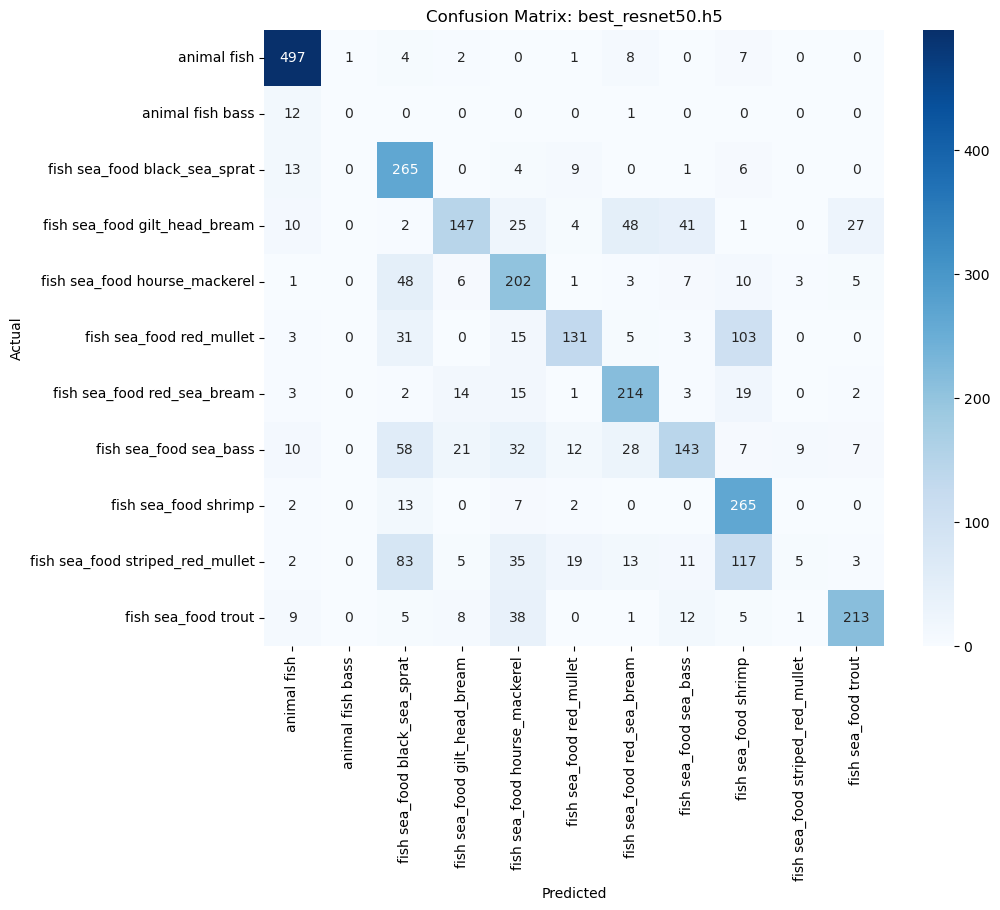


Evaluating: best_mobilenet.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       1.00      0.38      0.56        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      0.99      0.99       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       0.99      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      1.00      0.99       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           1.00   

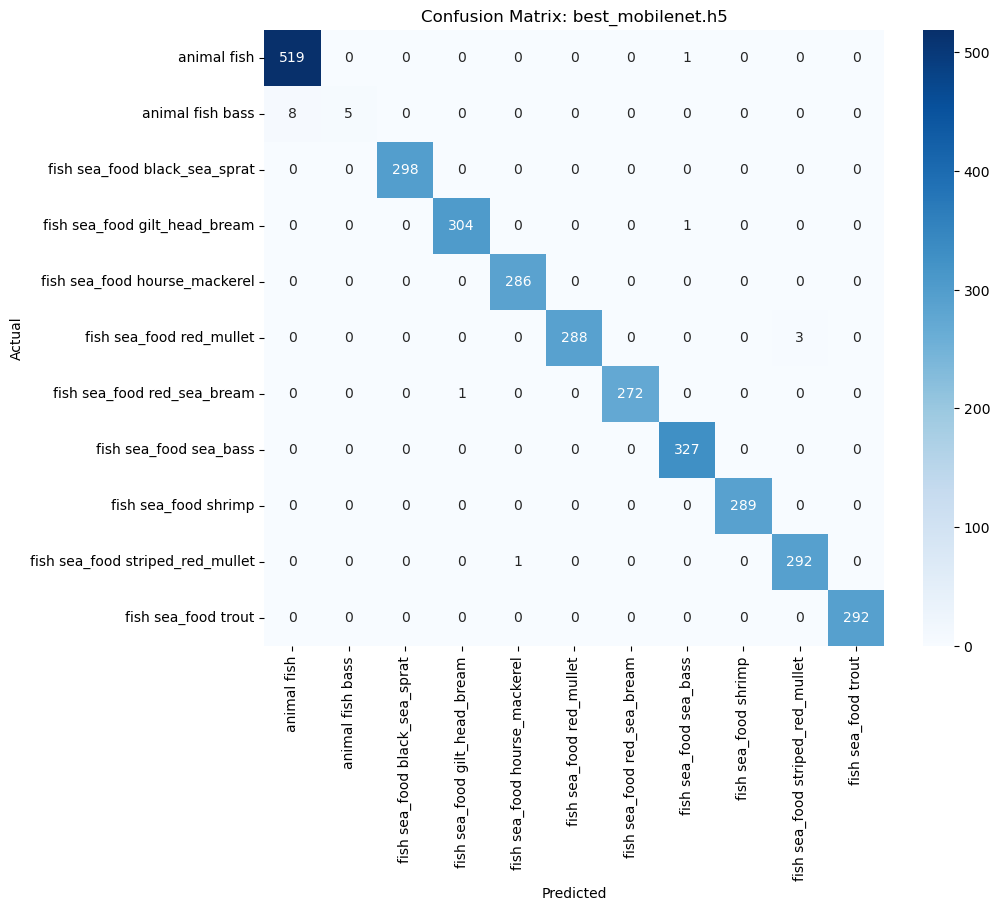


Evaluating: best_inceptionv3.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 717ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.98      0.96      0.97       298
   fish sea_food gilt_head_bream       0.97      0.99      0.98       305
   fish sea_food hourse_mackerel       0.95      0.99      0.97       286
        fish sea_food red_mullet       0.99      0.98      0.98       291
     fish sea_food red_sea_bream       1.00      0.97      0.98       273
          fish sea_food sea_bass       0.96      0.95      0.96       327
            fish sea_food shrimp       0.99      1.00      1.00       289
fish sea_food striped_red_mullet       0.96      0.94      0.95       293
             fish sea_food trout       0.98      1.00      0.99       292

                        accuracy                           0.97   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


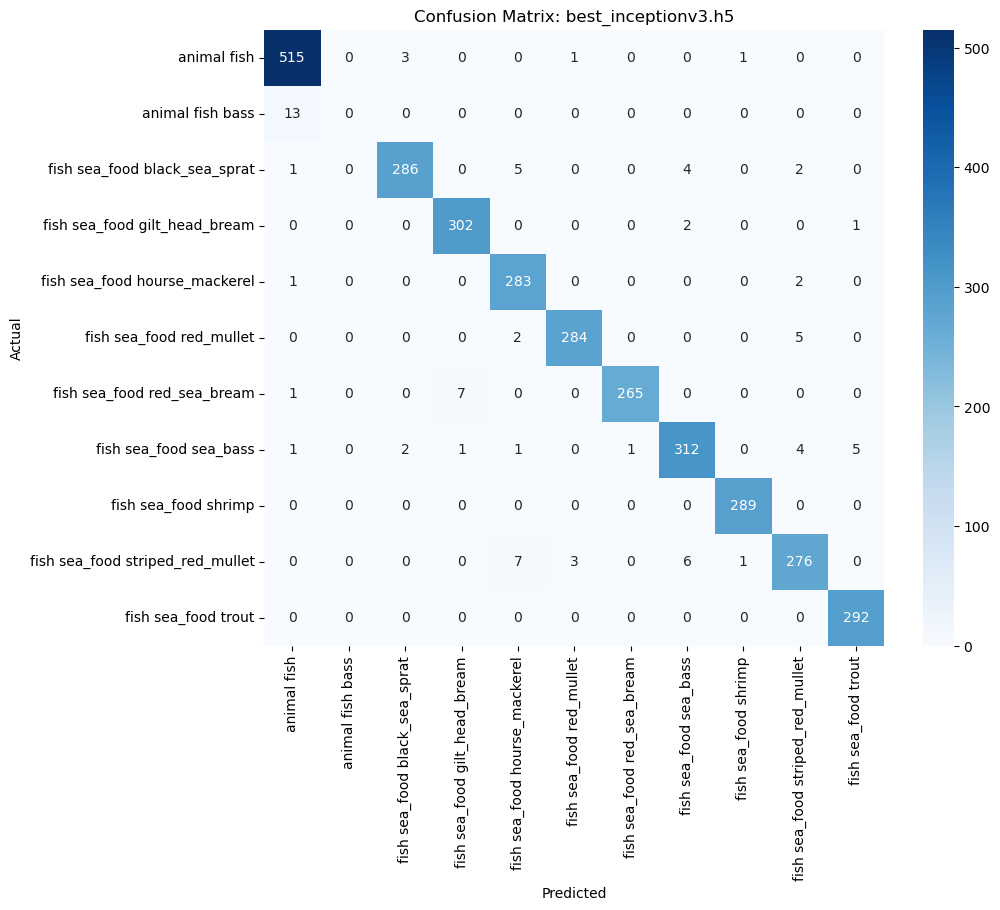


Evaluating: best_efficientnetb0.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 426ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        accuracy                           0.16   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


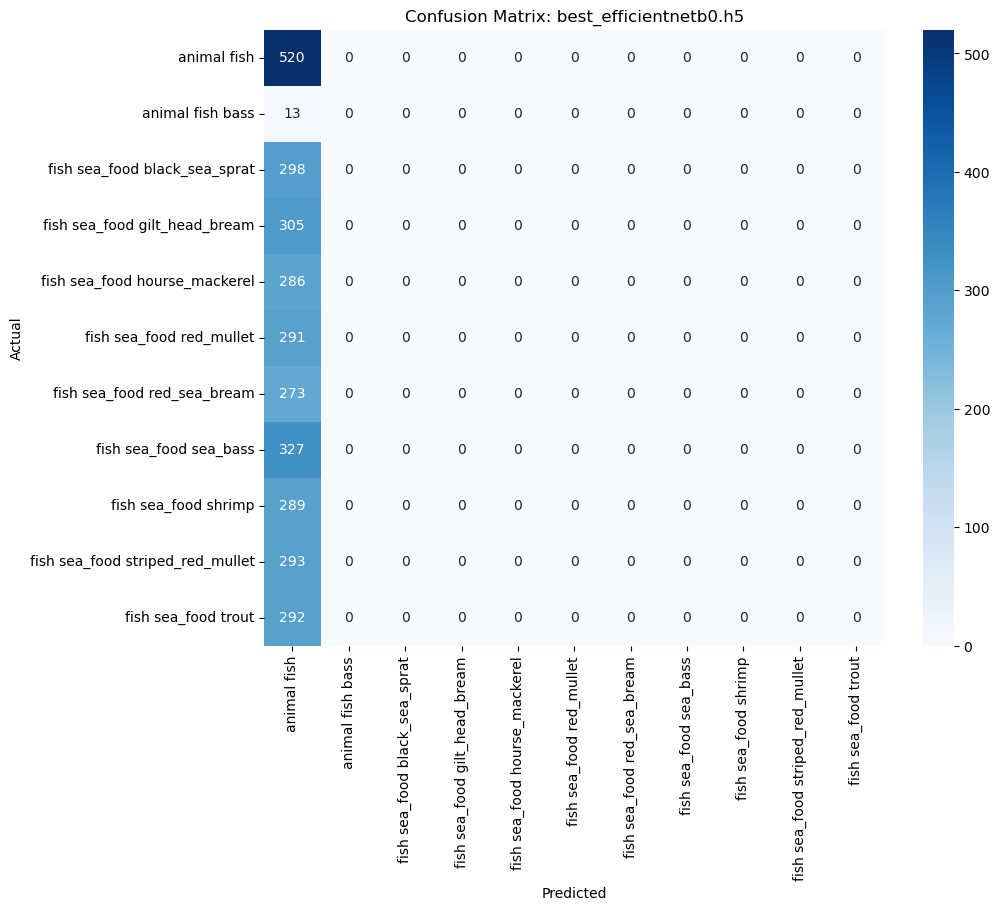

In [18]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
# Suppose test_generator is already set up:
# test_generator = val_test_datagen.flow_from_directory('images.cv_jzk6llhf18tm3k0kyttxz/data/test', ... shuffle=False)

model_files = [
    'best_vgg16.h5',
    'best_resnet50.h5',
    'best_mobilenet.h5',
    'best_inceptionv3.h5',
    'best_efficientnetb0.h5'
]

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Only rescale, no augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'images.cv_jzk6llhf18tm3k0kyttxz/data/test',  # Adjust path if needed
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct mapping of labels to predictions
)
for model_file in model_files:
    print(f"\nEvaluating: {model_file}")
    model = load_model(model_file)

    # Predict class indices
    y_true = test_generator.classes
    y_pred_probs = model.predict(test_generator, verbose=1)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Classification metrics
    print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.title(f"Confusion Matrix: {model_file}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.97      1.00      0.99       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       0.98      0.97      0.98       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       0.97      0.99      0.98       273
          fish sea_food sea_bass       0.98      0.98      0.98       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.99      0.99       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           0.99   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


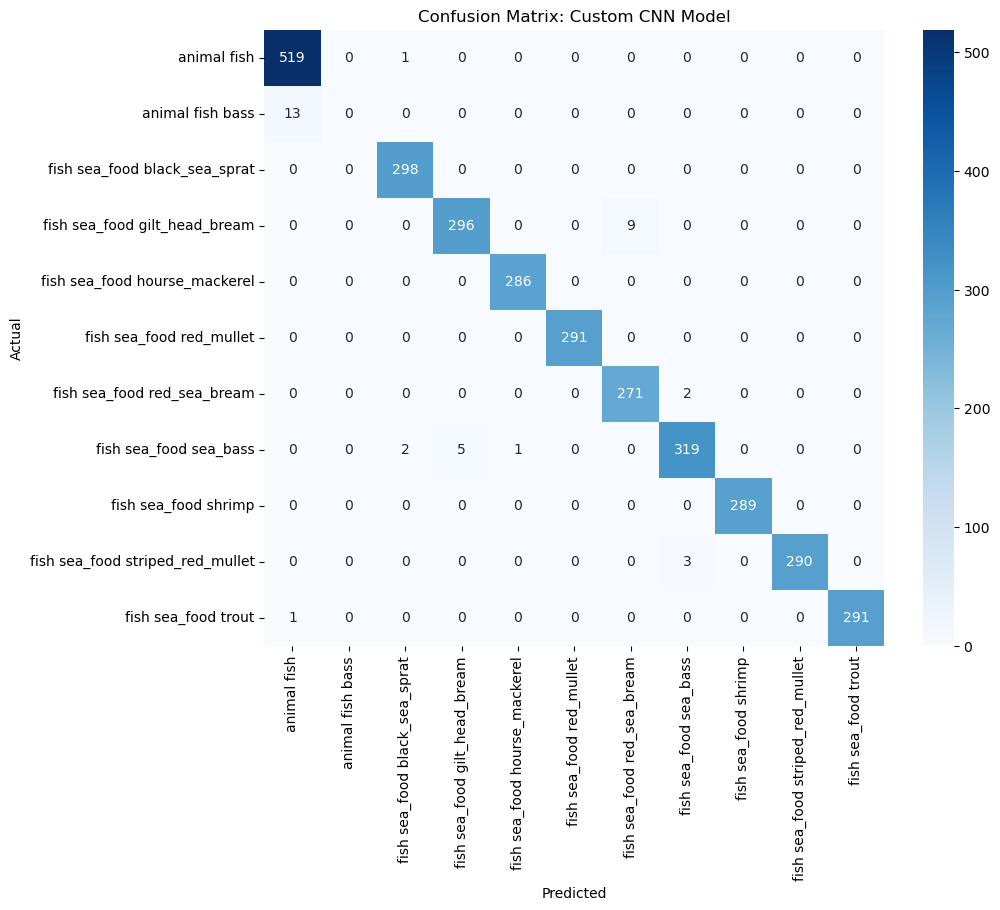

In [21]:
cnn_model = load_model('best_model.h5')

# Predict class indices for the test data
y_true = test_generator.classes
y_pred_probs = cnn_model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print accuracy, precision, recall, F1-score per class
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix: Custom CNN Model")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


# Fish Species Classification Project — Documentation

# Conclusion
